In [1]:
# 타자/경기별 기록 데이터를 불러오겠습니다. 
import pandas as pd

raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/baseball/KBO_2019_player_gamestats.csv', encoding = 'cp949')
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,0,2,1,0,0,3,3,0,0,0,0,0,0,1,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,2,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,1,3,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166




*   상대 팀별 기록 정리하기




In [2]:
raw['상대'].unique()

array(['한화', '키움', '@삼성', 'KT', 'NC', '@롯데', '@LG', 'SK', '@KIA', '@키움',
       '롯데', '@한화', 'LG', 'KIA', '@NC', '삼성', '@SK', '@KT', '두산', '@두산'],
      dtype=object)

In [3]:
# '상대' 컬럼에서   @가 붙어있는 경우에는 원정경기 / 없으면 홈 경기를 의미합니다. 
# '상대' 컬럼에서 홈/원정 여부,  상대팀을 분리하여 각각 '홈어웨이', '상대팀' 컬럼으로 저장하겠습니다. 

opp_list = []
home_away_list = []

for opp in raw['상대']:
    if '@' in opp:
      home_away = '원정'
      opp = opp.replace('@', '')
    else:
      home_away ='홈'

    opp_list.append(opp)
    home_away_list.append(home_away)

raw['홈어웨이'] = home_away_list
raw['상대팀'] = opp_list

raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,홈어웨이,상대팀
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,0,2,1,0,0,3,3,0,0,0,0,0,0,1,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,홈,한화
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,홈,한화
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,2,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,홈,키움
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,1,3,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,홈,키움
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,홈,키움


In [4]:
# 상대 팀별 실적을 정리하기 위해 피벗 테이블을 만들겠습니다. 
# 상대팀별 실적 정리
factors = ['타수','안타','홈런', '루타', '타점','볼넷', '사구', '희비']
data = raw.pivot_table(index = ['팀','이름','생일','상대팀'], values = factors, aggfunc='sum')
data.head()


루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         상대팀                                
KIA 고영창 1989-02-24 LG    0   0   0   0   0   0   0   0
    김선빈 1989-12-18 KT    5   1   0   4  33   4   0   0
                   LG   15   5   0  12  47   6   0   0
                   NC   14   8   0  14  42   2   0   0
                   SK   10   6   0  10  36   4   0   1

In [5]:
# 상대팀별 타수가 0보다 큰 경우의 데이터만 선택하겠습니다. 
cond = data['타수'] > 0
data = data[cond]
data.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         상대팀                                
KIA 김선빈 1989-12-18 KT    5   1   0   4  33   4   0   0
                   LG   15   5   0  12  47   6   0   0
                   NC   14   8   0  14  42   2   0   0
                   SK   10   6   0  10  36   4   0   1
                   두산   20   3   0  15  54   5   0   0

In [6]:
# reset_index()를 이용해 인덱스로 지정되어있는 팀/이름/생일 을 컬럼으로 변경하겠습니다. 
data = data.reset_index()
data

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,KT,5,1,0,4,33,4,0,0
1,KIA,김선빈,1989-12-18,LG,15,5,0,12,47,6,0,0
2,KIA,김선빈,1989-12-18,NC,14,8,0,14,42,2,0,0
3,KIA,김선빈,1989-12-18,SK,10,6,0,10,36,4,0,1
4,KIA,김선빈,1989-12-18,두산,20,3,0,15,54,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1663,한화,호잉,1989-05-18,SK,20,2,1,15,55,7,1,0
1664,한화,호잉,1989-05-18,두산,30,11,0,18,54,5,2,0
1665,한화,호잉,1989-05-18,롯데,18,2,1,11,43,6,1,0
1666,한화,호잉,1989-05-18,삼성,20,3,1,12,51,8,2,1


In [7]:
# 타자 주요 실적을 계산하는 함수입니다. 
def cal_hit(df):
    '''
    - 타율 : 공을 쳐서 나가는 비율 --> 안타 / 타수
    - 출루율: 진루해서 나가는 비율 -->  (안타+볼넷+몸에맞는볼)/(타수+볼넷+몸에맞는볼+희생플라이)
    - 장타율 : 타율에 진루한 베이스 가중치 추가 -->   루타 / 타수
    '''
    
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['사구'] + df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    return df

In [8]:
# 타자/상대팀별 실적을 계산하겠습니다. 
player_stats_opp = cal_hit(data)
player_stats_opp

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,KT,5,1,0,4,33,4,0,0,0.121212,0.151515,0.151515,0.303030
1,KIA,김선빈,1989-12-18,LG,15,5,0,12,47,6,0,0,0.255319,0.361702,0.319149,0.680851
2,KIA,김선빈,1989-12-18,NC,14,8,0,14,42,2,0,0,0.333333,0.523810,0.333333,0.857143
3,KIA,김선빈,1989-12-18,SK,10,6,0,10,36,4,0,1,0.277778,0.432432,0.277778,0.710210
4,KIA,김선빈,1989-12-18,두산,20,3,0,15,54,5,0,0,0.277778,0.333333,0.370370,0.703704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,한화,호잉,1989-05-18,SK,20,2,1,15,55,7,1,0,0.272727,0.321429,0.363636,0.685065
1664,한화,호잉,1989-05-18,두산,30,11,0,18,54,5,2,0,0.333333,0.537037,0.555556,1.092593
1665,한화,호잉,1989-05-18,롯데,18,2,1,11,43,6,1,0,0.255814,0.318182,0.418605,0.736786
1666,한화,호잉,1989-05-18,삼성,20,3,1,12,51,8,2,1,0.235294,0.301887,0.392157,0.694044


In [9]:
# 특정팀을 상대로 강한 타자를 살펴보겠습니다. 
## 먼저, '두산' 팀을 상대로 타수가 10 타수보다 많은 선수중 출루율 상위 10명을 찾아보겠습니다. 

team = '두산'
cond = (player_stats_opp['상대팀'] == team) & (player_stats_opp['타수'] > 10)
player_stats_opp[cond].sort_values(by='출루율',ascending=False).head(10)

,팀,이름,생일,상대팀,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
22,KIA,나지완,1985-05-19,두산,11,7,0,5,17,4,1,1,0.294118,0.666667,0.647059,1.313725
190,KT,강백호,1999-07-29,두산,18,10,0,14,42,8,1,0,0.333333,0.571429,0.428571,1.000000
538,NC,나성범,1989-10-03,두산,9,1,1,5,12,2,1,0,0.416667,0.538462,0.750000,1.288462
1664,한화,호잉,1989-05-18,두산,30,11,0,18,54,5,2,0,0.333333,0.537037,0.555556,1.092593
564,NC,박민우,1993-02-06,두산,25,5,1,20,49,7,0,0,0.408163,0.520000,0.510204,1.030204
145,KIA,터커,1990-07-06,두산,16,7,0,9,31,2,1,0,0.290323,0.516129,0.516129,1.032258
573,NC,박석민,1985-06-22,두산,20,7,0,12,37,13,2,0,0.324324,0.513514,0.540541,1.054054
1591,한화,이성열,1984-07-13,두산,30,8,1,20,54,15,1,2,0.370370,0.508772,0.555556,1.064327
1423,키움,샌즈,1987-09-28,두산,39,13,1,23,73,18,2,0,0.315068,0.500000,0.534247,1.034247
239,KT,박경수,1984-03-31,두산,14,6,1,12,37,9,0,0,0.324324,0.500000,0.378378,0.878378


In [10]:
# KBO  전체 팀을 대상으로 팀별 출루율 상위 5인 타자를 살펴보겠습니다. 

hitter_df = pd.DataFrame()

for team in player_stats_opp['상대팀']:
  cond = (player_stats_opp['상대팀'] == team) & (player_stats_opp['타수'] > 20)
  df = player_stats_opp[cond].sort_values(by = '출루율',ascending=False).head(5)
  hitter_df = hitter_df.append(df)
  

In [11]:
# 특정팀 상대 출루율 Top5 이내 들어있는 타자 리스트는 아래와 같습니다

hitter_df['이름'].unique()

array(['김헌곤', '박병호', '이형종', '최형우', '한동민', '정근우', '김하성', '터커', '박건우',
       '김재호', '민병헌', '박승욱', '최재훈', '강백호', '오재일', '장영석', '윌슨', '양의지',
       '이원재', '호잉', '박민우', '박석민', '황재균', '김상수', '서건창', '러프', '김혜성', '최정',
       '안치홍', '노수광', '샌즈', '최주환', '오지환'], dtype=object)

In [12]:
# 특정팀 상대 출루율 top5 이내 상위타자들을 대상으로  팀별 출루율 피벗테이블을 만들어보겠습니다. 
cond = player_stats_opp['이름'].isin(hitter_df['이름'].unique())
top_df = player_stats_opp[cond]

top_pivot = top_df.pivot_table(index=['팀','이름'], values='출루율', columns='상대팀',aggfunc='sum')
top_pivot

상대팀           KIA        KT        LG  ...        삼성        키움        한화
팀   이름                                 ...                              
KIA 안치홍       NaN  0.306122  0.521739  ...  0.500000  0.567568  0.420000
    최형우       NaN  0.540000  0.478261  ...  0.615385  0.471698  0.472727
    터커        NaN  0.400000  0.594595  ...  0.317073  0.447368  0.388889
KT  강백호  0.470588       NaN  0.338983  ...  0.448980  0.487805  0.617647
    박승욱  0.210526       NaN  0.222222  ...  0.240000  0.230769  0.285714
    황재균  0.333333       NaN  0.454545  ...  0.448276  0.288462  0.441860
LG  오지환  0.576923  0.446429       NaN  ...  0.423077  0.295082  0.360000
    이형종  0.479167  0.550000       NaN  ...  0.476190  0.444444  0.333333
NC  박민우  0.529412  0.365385  0.397059  ...  0.392857  0.408163  0.577778
    박석민  0.342105  0.500000  0.416667  ...  0.274194  0.594595  0.571429
    양의지  0.720930  0.354167  0.396552  ...  0.340426  0.435897  0.575000
    이원재  0.407407  0.357143  0.250000  ...  0.360000  0.250000  0.375000
SK  노수광  0.326923  0.370370  0.428571  ...  0.352941  0.307692  0.594595
    최정   0.543860  0.457627  0.432836  ...  0.551724  0.338028  0.516667
    한동민  0.333333  0.538462  0.423077  ...  0.314286  0.406250  0.454545
두산  김재호  0.444444  0.486486  0.568182  ...  0.510638  0.516129  0.425532
    박건우  0.297872  0.531915  0.574468  ...  0.509804  0.312500  0.400000
    오재일  0.408163  0.384615  0.254545  ...  0.372881  0.383333  0.534483
    최주환  0.594595  0.218750  0.388889  ...  0.454545  0.326087  0.300000
롯데  민병헌  0.677419  0.459459  0.404255  ...  0.420000  0.204545  0.437500
    윌슨   0.250000  0.269231  0.571429  ...  0.560000  0.451613  0.566667
삼성  김상수  0.535714  0.274510  0.312500  ...       NaN  0.269231  0.390625
    김헌곤  0.259259  0.615385  0.380952  ...       NaN  0.388889  0.625000
    러프   0.388889  0.426230  0.433962  ...       NaN  0.428571  0.573770
키움  김하성  0.402985  0.320755  0.647887  ...  0.353846       NaN  0.379310
    김혜성  0.333333  0.357143  0.339286  ...  0.644444       NaN  0.166667
    박병호  0.620690  0.609756  0.467532  ...  0.560000       NaN  0.446809
    샌즈   0.464286  0.426230  0.361446  ...  0.540984       NaN  0.584906
    서건창  0.450000  0.333333  0.387097  ...  0.395833       NaN  0.454545
    장영석  0.339623  0.333333  0.282051  ...  0.333333       NaN  0.444444
한화  정근우  0.214286  0.309524  0.703704  ...  0.444444  0.300000       NaN
    최재훈  0.531915  0.489362  0.478261  ...  0.306122  0.441860       NaN
    호잉   0.375000  0.380952  0.274510  ...  0.301887  0.438596       NaN

[33 rows x 10 columns]

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


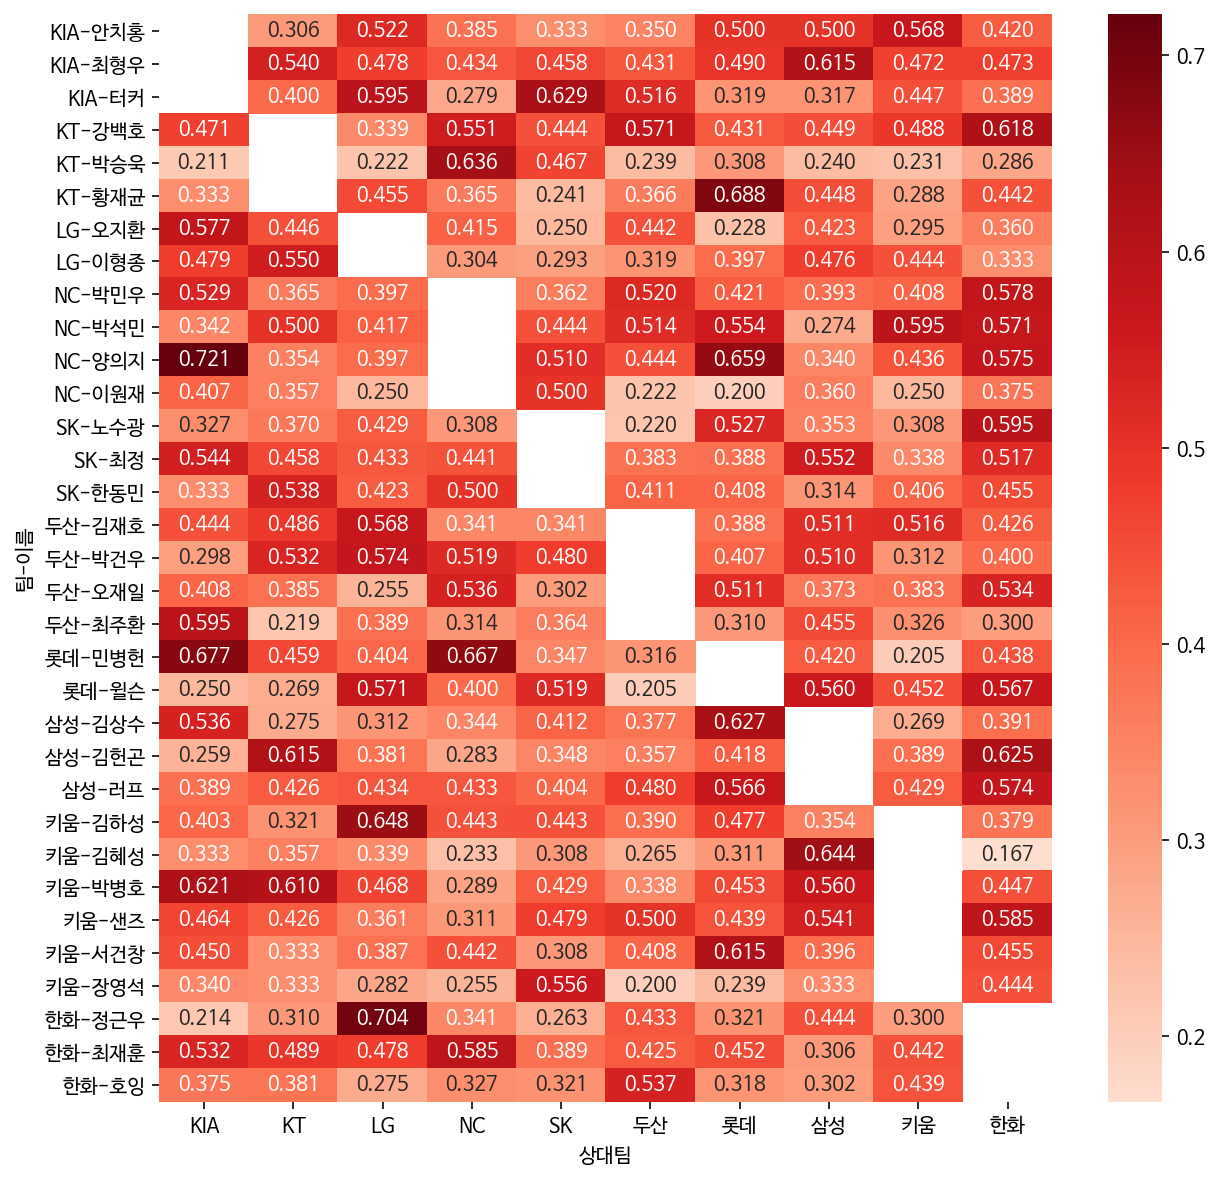

In [15]:
# 한번에 살펴보기 위해 히트맵으로 표시해보겠습니다. 

import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(top_pivot,
            annot=True,
            fmt='.3f',
            center=0.4,
            cmap='Reds'
            )
